<a href="https://colab.research.google.com/github/nevetto/ml_sport_model/blob/main/ml_sport_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [ ]:
dataset= pd.read_csv("/sport_data.csv", encoding="latin-1")
dataset.head()

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     18 non-null     int64 
 1   Height  18 non-null     int64 
 2   Sex     18 non-null     object
 3   Sport   18 non-null     object
dtypes: int64(2), object(2)
memory usage: 704.0+ bytes


In [ ]:
dataset.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000


In [ ]:
dataset['Sex'].replace(['Female','Male'],[0,1], inplace=True)

In [ ]:
dataset.head()

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball


**IMPORT MACHINE LEARNING LIBRARIES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x=dataset.drop('Sport', axis=1)

In [ ]:
x.head()

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1


In [ ]:
y = dataset.drop(columns=['Age','Height','Sex'])

In [ ]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.30)

## BUILD MACHINE LEARNING MODEL

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
test = clf.predict(X_test)
test

array(['Soccer', 'Basketball', 'Hockey', 'Basketball', 'Hockey',
       'Basketball'], dtype=object)

In [ ]:
y_test

,Sport
15,Hockey
14,Basketball
8,Hockey
5,Basketball
16,Hockey
3,Basketball


# CHECK FOR EFFICACY

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test, test)

In [ ]:
accuracy

0.8333333333333334

In [ ]:
new_student= clf.predict([[15,4,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
new_student

array(['Hockey'], dtype=object)

## SAVE MODEL

In [ ]:
import sklearn.externals
import joblib 

In [ ]:
joblib.dump(clf,'ml_sport_model.joblib')

['ml_sport_model.joblib']

In [100]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [101]:
c_matrix = confusion_matrix(y_test, test)
c_matrix

array([[3, 0, 0],
       [0, 2, 1],
       [0, 0, 0]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


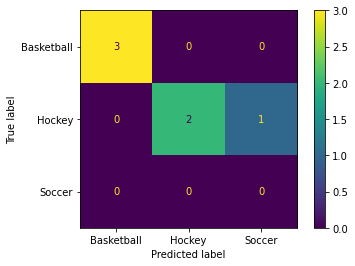

In [102]:
plot_confusion_matrix(clf, X_test, y_test)

In [103]:
y_test

,Sport
15,Hockey
14,Basketball
8,Hockey
5,Basketball
16,Hockey
3,Basketball


In [104]:
classification_report(y_test, test)
# print(classification_report(y_test, test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n  Basketball       1.00      1.00      1.00         3\n      Hockey       1.00      0.67      0.80         3\n      Soccer       0.00      0.00      0.00         0\n\n    accuracy                           0.83         6\n   macro avg       0.67      0.56      0.60         6\nweighted avg       1.00      0.83      0.90         6\n'

In [ ]:
              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         3
      Hockey       1.00      0.67      0.80         3
      Soccer       0.00      0.00      0.00         0

    accuracy                           0.83         6
   macro avg       0.67      0.56      0.60         6
weighted avg       1.00      0.83      0.90         6
